In [95]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from numpy import genfromtxt
import scipy.optimize as optimization
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


TAC calibration: 192 = 3.82 118 = 2.22

In [96]:
74/1.6

46.25

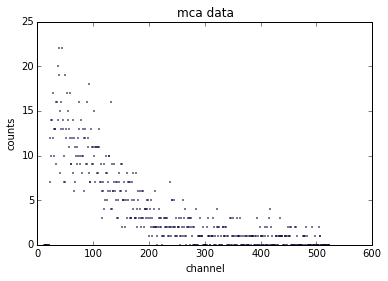

In [97]:
f = genfromtxt("muon_data_14May2015.mca", delimiter=',')
x = np.arange(0, len(f))

plt.plot(x, f, 'o', markersize = 1)
plt.title('mca data')
plt.xlabel('channel')
plt.ylabel('counts')


plt.show()

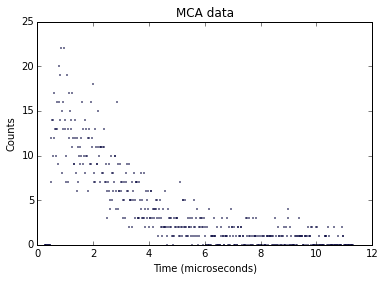

0.0216216216216


In [98]:
t = x/46.25

plt.plot(t, f, 'o', markersize = 1)
plt.title('MCA data')
plt.xlabel('Time (microseconds)')
plt.ylabel('Counts')


plt.show()
print t[1] - t[0]

offset: -0.220703689679
N0: 20.380834058
lifetime (tau): 2.63180834672


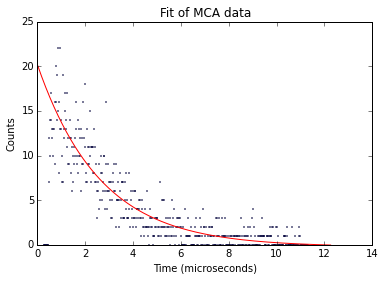

In [99]:
s = 28
fin = -44

def exponential(t, *p):
    off, N0, tau = p
    return off + N0*numpy.exp(-t/tau)

p0 = [1.0, 25.0, 1.0]

a, b = curve_fit(exponential, t[s:fin], f[s:fin], p0)
off= a[0]
N0 = a[1]
tau = a[2]
print 'offset:', off
print 'N0:', N0
print "lifetime (tau):", tau

fit = lambda t: off + N0*numpy.exp(-t/tau)

plt.plot(t, f, 'bo', markersize = 1)
plt.plot(t, fit(t), 'r')
plt.title('Fit of MCA data')
plt.xlabel('Time (microseconds)')
plt.ylabel('Counts')
plt.ylim(0, 25)

plt.show()

In [88]:
f = genfromtxt("muon_data_14May2015.mca", delimiter=',')
f = f[28: -44]

In [89]:
print len(f)

496


In [92]:
steps = arange(0, len(f), 3)
g = []
T = []
for i in steps:
    g.append(sum(f[i:i+3]))
    T.append(sum(t[i:i+3])/3.0)

offset: -0.653144306426
N0: 48.6123745755
grouped lifetime (tau): 2.62754426523


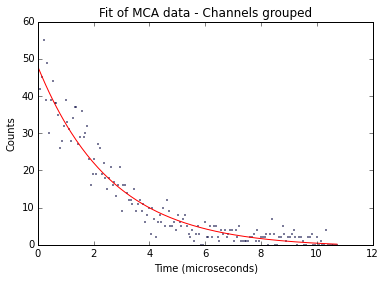

In [93]:
def exponential(t, *p):
    off, N0, tau = p
    return off + N0*numpy.exp(-t/tau)

p0 = [1.0, 25.0, 1.0]

c, d = curve_fit(exponential, T, g, p0)
off_2= c[0]
N0_2 = c[1]
tau_2 = c[2]
print 'offset:', off_2
print 'N0:', N0_2
print "grouped lifetime (tau):", tau_2

fit2 = []
for i in T:
    fit2.append(off_2 + N0_2*numpy.exp(-i/tau_2))

plt.plot(T, g, 'bo', markersize = 1)
plt.plot(T, fit2, 'r')
plt.title('Fit of MCA data - Channels grouped')
plt.xlabel('Time (microseconds)')
plt.ylabel('Counts')

plt.show()

In [79]:
f = genfromtxt("muon_data_14May2015.mca", delimiter=',')
f = f[28: -44]

average = sum(f)/len(f)
print "tau (average):", average

tau (average): 3.70161290323
